In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [4]:
df=pd.read_csv(r"C:\Users\MANISH MISHRA\Desktop\universal bank\UniversalBank (1).csv")

In [5]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
df.isna()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
# scalling the dataset using standard scalling
scaler = StandardScaler()
scaled = scaler.fit(df.drop('CreditCard',axis=1)).transform(df.drop('CreditCard',axis=1))
df_scaled = pd.DataFrame(scaled, columns=df.columns[:-1])

In [48]:
df_scaled.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.731704,-1.774417,-1.666078,-0.538229,-0.964114,1.397414,-0.193371,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
1,-1.731012,-0.029524,-0.096330,-0.864109,-1.443932,0.525991,-0.250595,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
2,-1.730319,-0.552992,-0.445163,-1.363793,0.738814,-1.216855,-0.536720,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
3,-1.729626,-0.901970,-0.968413,0.569765,0.452243,-1.216855,0.436103,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
4,-1.728933,-0.901970,-1.055621,-0.625130,-0.859007,1.397414,-0.536720,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618


In [49]:
x = df_scaled
y = df['CreditCard']

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [51]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [52]:
svc=SVC() 
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)

In [53]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.7416


In [54]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)

In [55]:
print(confusion_matrix)

[[871   5]
 [318  56]]


In [56]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


##### here we can see that zip code has the laarger value compare to others feature value and zip code is not going to effect much in the dataset so it is better to drop this feature for the better outcome of the model

In [57]:
df1 = df.drop(["ZIP Code"], axis = 1)
df1=df
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### now i will separate the 0 and 1 class for the creditcard data

In [58]:
zero_class = df[df.CreditCard==0]
zero_class.shape

(3530, 14)

In [59]:
one_class = df[df.CreditCard==1]
one_class.shape

(1470, 14)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84       876
           1       0.92      0.15      0.26       374

    accuracy                           0.74      1250
   macro avg       0.83      0.57      0.55      1250
weighted avg       0.79      0.74      0.67      1250



### applying linear function 

In [61]:
linear_classifier=SVC(kernel='linear').fit(x_train,y_train)
y_pred = linear_classifier.predict(x_test)

In [62]:
print("accuracy score with linear function:",(accuracy_score(y_test, y_pred)))

accuracy score with linear function: 0.7392


In [63]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[866  10]
 [316  58]]


<Axes: >

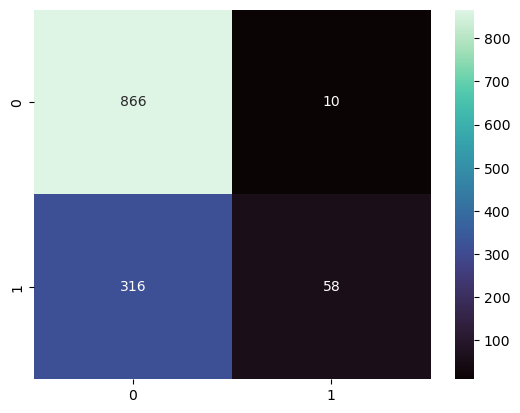

In [64]:
## plotting confusion matrix for linear function
sns.heatmap(confusion_matrix,annot=True,fmt='d', cmap='mako')

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84       876
           1       0.85      0.16      0.26       374

    accuracy                           0.74      1250
   macro avg       0.79      0.57      0.55      1250
weighted avg       0.77      0.74      0.67      1250



### applying polynomial function

In [66]:
Poly_svc=SVC(kernel='poly',degree=3).fit(x_train,y_train)
y_pred = Poly_svc.predict(x_test)

In [67]:
print("accuracy score with polynomial function:",accuracy_score(y_test,y_pred))

accuracy score with polynomial function: 0.7376


In [68]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[870   6]
 [322  52]]


<Axes: >

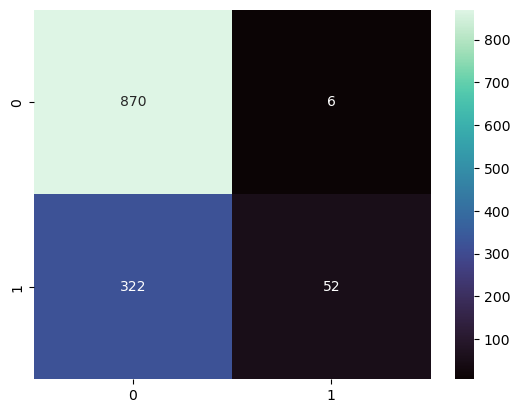

In [69]:
## lets plot confusion matrix for polynomialfunction
sns.heatmap(confusion_matrix,annot=True,fmt='d', cmap='mako')

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84       876
           1       0.90      0.14      0.24       374

    accuracy                           0.74      1250
   macro avg       0.81      0.57      0.54      1250
weighted avg       0.78      0.74      0.66      1250



## applying rbf using kernel trick

In [71]:
rbf_svc=SVC(kernel='rbf').fit(x_train,y_train)
y_pred = rbf_svc.predict(x_test)

In [72]:
print("accuracy score with rbf function:",accuracy_score(y_test,y_pred))

accuracy score with rbf function: 0.7416


In [73]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[871   5]
 [318  56]]


In [74]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[871   5]
 [318  56]]


<Axes: >

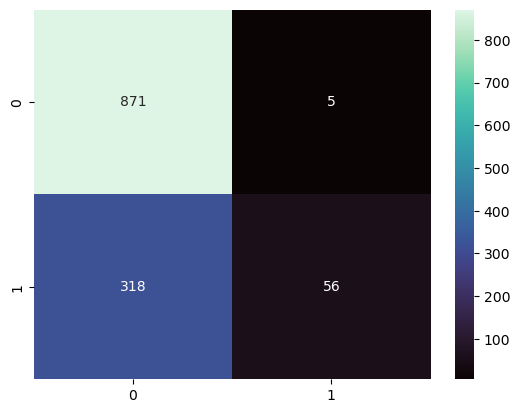

In [75]:
## plotting confusion matrix for linear function
sns.heatmap(confusion_matrix,annot=True,fmt='d', cmap='mako')

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84       876
           1       0.92      0.15      0.26       374

    accuracy                           0.74      1250
   macro avg       0.83      0.57      0.55      1250
weighted avg       0.79      0.74      0.67      1250



## applying sigmoid function using kernel trick

In [77]:
Poly_svc=SVC(kernel='sigmoid', C=1).fit(x_train,y_train)
y_pred = Poly_svc.predict(x_test)

In [78]:
print("accuracy score with sigmoid function :",accuracy_score(y_test,y_pred))

accuracy score with sigmoid function : 0.6432


In [79]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[704 172]
 [274 100]]


<Axes: >

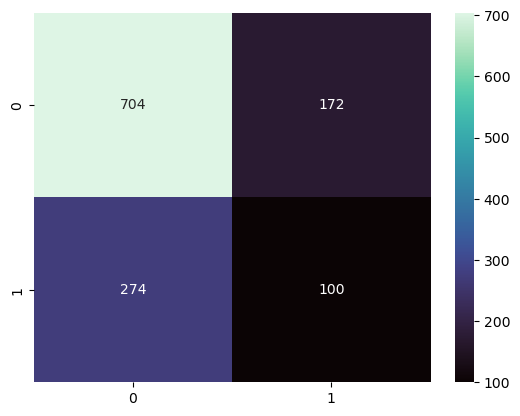

In [80]:
## plotting confusion matrix for sigmoid function
sns.heatmap(confusion_matrix,annot=True,fmt='d', cmap='mako')


In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       876
           1       0.37      0.27      0.31       374

    accuracy                           0.64      1250
   macro avg       0.54      0.54      0.53      1250
weighted avg       0.61      0.64      0.62      1250



## here we can see that accuracy score for the different function using kernel trick is varrying but there is a very small margin for all the function except sigmoid function
##### accuracy score for linear=0.7392
##### accuracy score for polynomial with degree 3=0.7376
##### accuracy score for rbf=0.7416
##### accuracy score for sigmoid function=0.6432

